# <center>ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы, отследить иные взаимосвязи в данных (при наличии).

HR-агентство хочет получить ответы на следующие вопросы и выяснить, какие факторы влияют на зарплату специалиста Data Scientist:

1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
5. Отразить интересные закономерности при наличии.

Для ответа на каждый вопрос будет использоваться уровень значимости: $\alpha = 0.05$

## Содержание датасета:

1. work_year - Год, в котором была выплачена зарплата.
2. experience_level - Опыт работы на этой должности в течение года со следующими возможными значениями:
* EN — Entry-level/Junior;
* MI — Mid-level/Intermediate;
* SE — Senior-level/Expert;
* EX — Executive-level/Director.
3. employment_type - Тип трудоустройства для этой роли:
* PT — неполный рабочий день;
* FT — полный рабочий день;
* CT — контракт;
* FL — фриланс.
4. job_title - Роль, в которой соискатель работал в течение года.
5. salary - Общая выплаченная валовая сумма заработной платы.
6. salary_currency - Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
7. salary_in_usd - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
8. employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
9. remote_ratio - Общий объём работы, выполняемой удалённо. Возможные значения:
* 0 — удалённой работы нет (менее 20 %);
* 50 — частично удалённая работа;
* 100 — полностью удалённая работа (более 80 %).
10. company_location - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
11. company_size - Среднее количество людей, работавших в компании в течение года:
* S — менее 50 сотрудников (небольшая компания);
* M — от 50 до 250 сотрудников (средняя компания);
* L — более 250 сотрудников (крупная компания).

# <center> ЗАГРУЗКА И ОБРАБОТКА ДАННЫХ

In [1]:
# Загрузка основных библиотек для статистических расчетов
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2")

# функции используемые для определения значения p
from project_functions import decision_hypothesis, decision_normality, main_numeric_statistics

# !Данная библиотека используется только для того, чтобы не выводить разные предупреждения и не используется для расчетов!
import warnings
warnings.filterwarnings('ignore')

# Задаем уровень значимости альфа
ALPHA = 0.05

In [2]:
# Загрузка датасета
salaries_df = pd.read_csv('Data/salaries_df.csv', sep=',')

'Первые 5 строк в начале и в конце датасета'

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


'Структура данных'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


None

'Основные статистические данные'

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.0,607.0,607.0,607.0,607.0
mean,303.0,2021.0,324000.0,112298.0,71.0
std,175.0,1.0,1544357.0,70957.0,41.0
min,0.0,2020.0,4000.0,2859.0,0.0
25%,152.0,2021.0,70000.0,62726.0,50.0
50%,303.0,2022.0,115000.0,101570.0,100.0
75%,454.0,2022.0,165000.0,150000.0,100.0
max,606.0,2022.0,30400000.0,600000.0,100.0


'Уникальные признаки'

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

'Тепловая карта пропусков'

'Данные о пропусках'

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

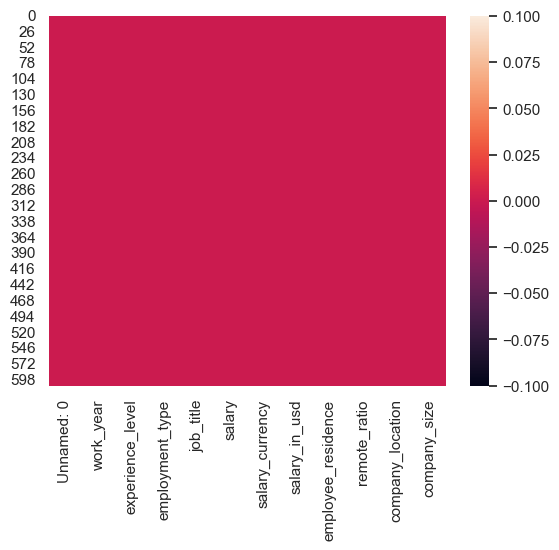

In [3]:
# Просмотр первых и последний строк
display('Первые 5 строк в начале и в конце датасета')
display(salaries_df.head(5))
display()
display(salaries_df.tail(5))

# Проверка данных
display('Структура данных')
display(salaries_df.info())

display(f'Основные статистические данные')
display(salaries_df.describe().round())

display('Уникальные признаки')
display(salaries_df.nunique())

# Тепловая диаграмма пропусков
display('Тепловая карта пропусков')
sns.heatmap(salaries_df.isnull())

display('Данные о пропусках')
display(salaries_df.isnull().sum())

# Вывод:

В датасете 607 без пропусков, соответственно работать с пропусками не требуется!

Кроме того, можно сделать выводы, что:

1. В датасете присутствует лишний столбец 'Unnamed: 0', удаляем его;
2. Тип признака 'work_year' лучше поменять с типа int64() на datetime, однако делать это не имеет смысла т.к. для дальнейших проверок потребуется числовой тип данных.

In [4]:
# Удаляем лишний столбец unnamed 0
salaries_df = salaries_df.drop(columns='Unnamed: 0')

# Меняем признак года на формат date
# salaries_df['work_year'] = pd.to_datetime(salaries_df['work_year'], format='%Y')

display(f'Количество дубликатов в данных: {salaries_df[salaries_df.duplicated()].shape[0]}')

# Удаляем дубликаты:
salaries_df = salaries_df.drop_duplicates()
display(f'Количество дубликатов в данных после удаления: {salaries_df[salaries_df.duplicated()].shape[0]}')

'Количество дубликатов в данных: 42'

'Количество дубликатов в данных после удаления: 0'

## Числовые признаки

In [5]:
display('Числовые признаки')
numeric_features = salaries_df.select_dtypes(include='number').columns
for i, n in enumerate(list(numeric_features)): display(f'{i} - {n}')

'Числовые признаки'

'0 - work_year'

'1 - salary'

'2 - salary_in_usd'

'3 - remote_ratio'

# Вывод:

Основными числовыми признаками в датасете являются:
- work_year - Год в котором выплачена зарплата (три значения 2020-2022);
- salary - Общая зарплата за год (более 500,000);
- salary_in_usd - Зарплата расчитанная в долл.США (пик 100,000);
- remote_ration - Общий объем выполняемый удаленно (больше всего людей работает удаленно).

Из числовых признаков следует использовать:
1. salary_in_usd (для ответа на ключевые вопросы).
2. work_year (для ответа на ключевые вопросы);

Остальные признаки не будут использоваться в исследования т.к. являются не информативными.

In [6]:
main_numeric_statistics(data_df=salaries_df, feature_name='salary_in_usd')

--------------------
Максимальное значение: 600000

Минимальное значение: 2859

Среднее арифметическое: 110610.34336283186

Размах: 597141

Мода: 0    100000
Name: salary_in_usd, dtype: int64

Медиана: 100000.0
--------------------


## Категориальные признаки

In [7]:
display('Частота признака - местонахождение компаний (топ 10)')
salaries_df['company_location'].value_counts().nlargest(10)

'Частота признака - местонахождение компаний (топ 10)'

company_location
US    318
GB     46
CA     28
DE     27
IN     24
FR     15
ES     14
GR     10
JP      6
NL      4
Name: count, dtype: int64

## Вывод:

Двумя самыми распространенными работодателями являются компании из США и Великобритании.

In [8]:
display('Частота признака - уровень опыта')
salaries_df['experience_level'].value_counts()

'Частота признака - уровень опыта'

experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64

## Вывод:

Двумя самыми распространенными в датасете уровнями опыта являются:
- Senjor/Expert;
- Middle/Intermediate

In [9]:
display('Частота признака - должности в компаниях (топ 2)')
salaries_df['job_title'].value_counts().nlargest(2)

'Частота признака - должности в компаниях (топ 2)'

job_title
Data Scientist    130
Data Engineer     121
Name: count, dtype: int64

## Вывод:

Двумя самыми распространенными ролями в датасете являются:
- Data Scientist;
- Data Engineer.

In [10]:
display('Частота признака - размер компаний')
salaries_df['company_size'].value_counts()

'Частота признака - размер компаний'

company_size
M    290
L    193
S     82
Name: count, dtype: int64

## Вывод:

Двумя самыми распространенными работодателями в датасете являются:
- M - Средние компании (от 50 до 250 человек);
- L - Большие компании (более 250 человек).

Из категориальных признаков следует использовать:
1. сompany_location (для дополнительных исследований);
2. experience_level (для дополнительных исследований);
3. job_title (для ответа на ключевые вопросы);
4. company_size (для ответа на ключевые вопросы).

Остальные признаки не будут использоваться в исследования т.к. являются не информативными.

# <center> ВИЗУАЛЬНЫЙ АНАЛИЗ ДАННЫХ

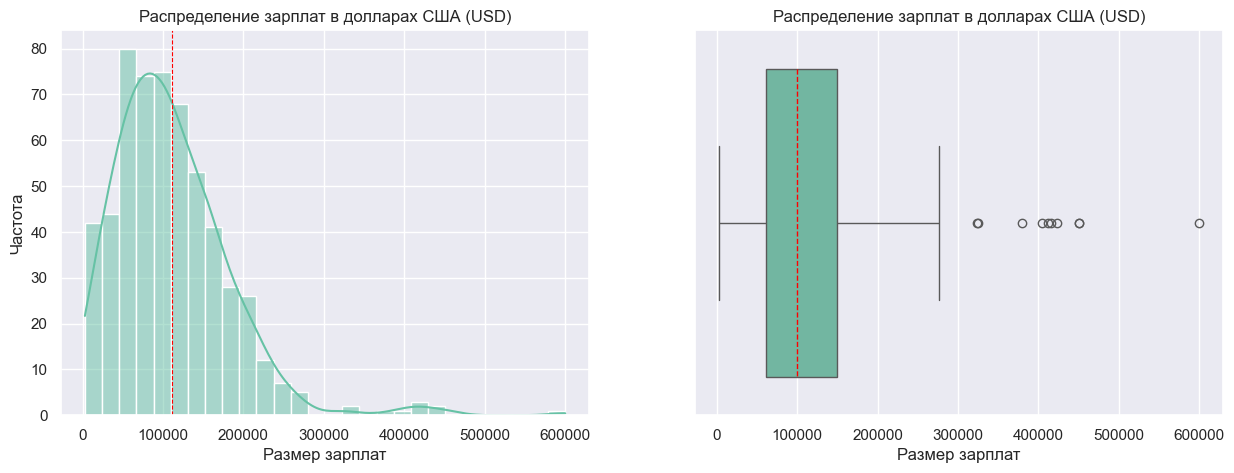

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(
    data=salaries_df['salary_in_usd'], 
    kde=True, 
    ax=axes[0])
axes[0].set(xlabel='Размер зарплат', ylabel='Частота')
axes[0].set_title('Распределение зарплат в долларах США (USD)')
axes[0].axvline(salaries_df['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(
    data=salaries_df['salary_in_usd'], 
    ax=axes[1], 
    orient='h', 
    medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Размер зарплат')
axes[1].set_title('Распределение зарплат в долларах США (USD)')

plt.show()

## Вывод:

Из графика слева видно, что данные распределены ненормально (имеется правостороняя ассиметрия), кроме того в датасете присутствуют выбросы (коробчатая диаграмма).

'Распределение для категориальных признаков'

Text(0, 0.5, 'Количество')

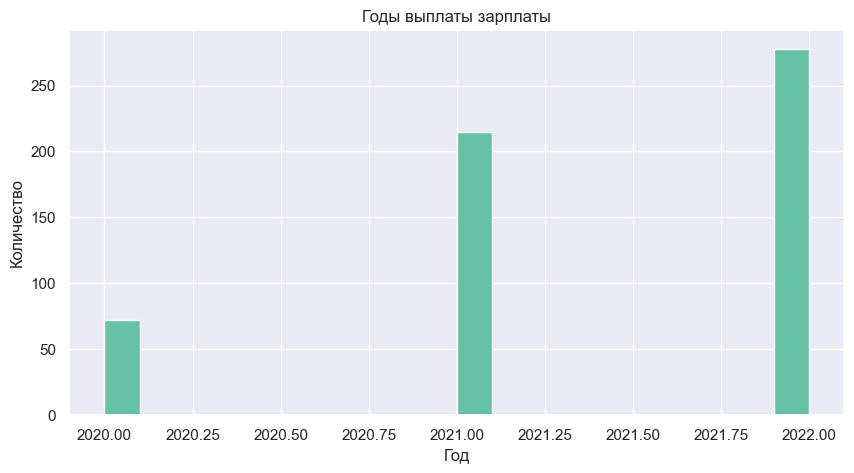

In [12]:
display('Распределение для категориальных признаков')
salaries_df['work_year'].hist(bins=20, figsize=(10, 5))
plt.title('Годы выплаты зарплаты')
plt.xlabel('Год')
plt.ylabel('Количество')

## Вывод:

В данных присутствует 2020, 2021 и 2022 гг, уровень выплат растет по прогрессии. Кроме того, визуально есть значительное различие между годами, что указывает на значительный рост зарплат в 2022 году.

'Распределение для категориальных признаков'

Text(0, 0.5, 'Количество')

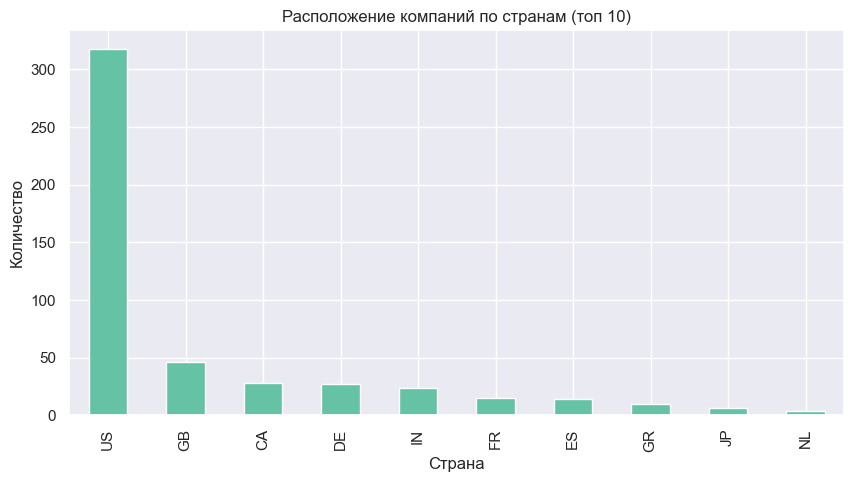

In [13]:
display('Распределение для категориальных признаков')
salaries_df['company_location'].value_counts().nlargest(10).plot(kind='bar', figsize=(10, 5))
plt.title('Расположение компаний по странам (топ 10)')
plt.xlabel('Страна')
plt.ylabel('Количество')

## Вывод:

В данных два самых распространенных региона: США и Великобритания. Первое место по количеству компаний занимает США, второе - Великобритания. Между ними большой разрыв.

'Распределение для категориальных признаков'

Text(0, 0.5, 'Количество')

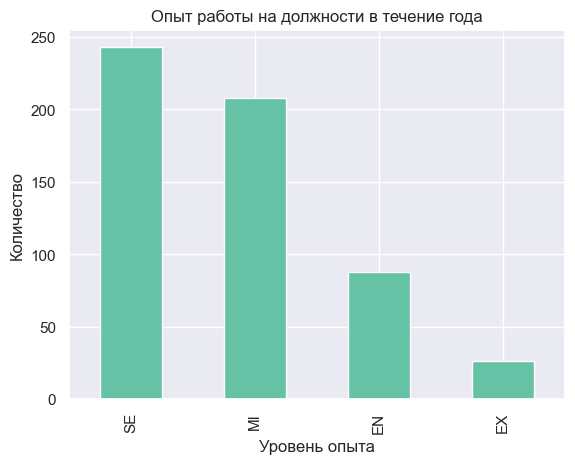

In [14]:
display('Распределение для категориальных признаков')
salaries_df['experience_level'].value_counts().plot(kind='bar')
plt.title('Опыт работы на должности в течение года')
plt.xlabel('Уровень опыта')
plt.ylabel('Количество')

## Вывод:

В данных присутствует четыре уровня опыта-категории: SE (Senior), MI (Middle), EN (Junior), EX (Director). Самым распространенным опытом является Средний и Высокий уровни.

'Категориальные признаки'

Text(0, 0.5, 'Количество')

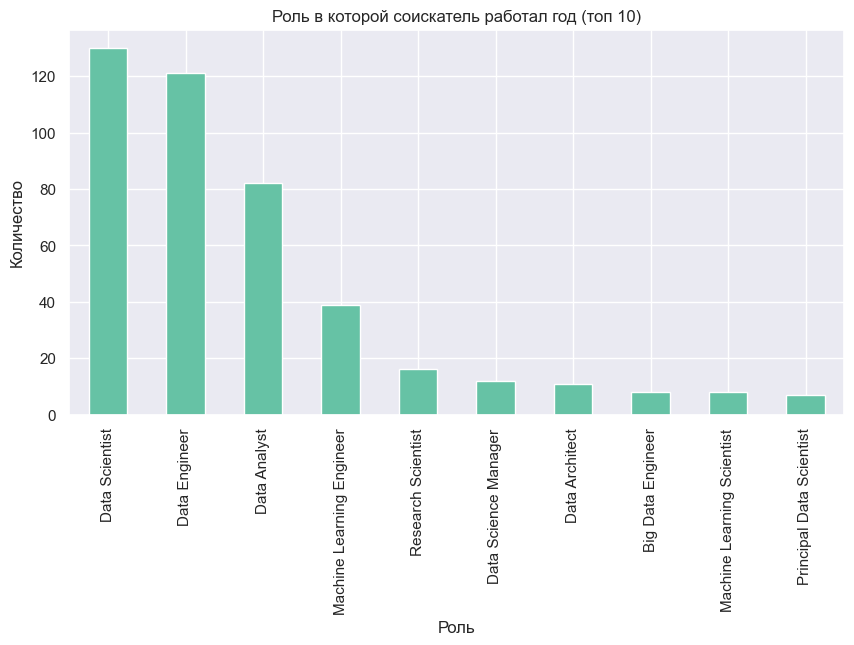

In [15]:
display('Категориальные признаки')
salaries_df['job_title'].value_counts().nlargest(10).plot(kind='bar', figsize=(10, 5))
plt.title('Роль в которой соискатель работал год (топ 10)')
plt.xlabel('Роль')
plt.ylabel('Количество')

## Вывод:

Два самых растространенных должности Data Scientist и Data Engineer. Визуально очевидно, что количество Data Scientist больше.

'Категориальные признаки'

Text(0, 0.5, 'Количество')

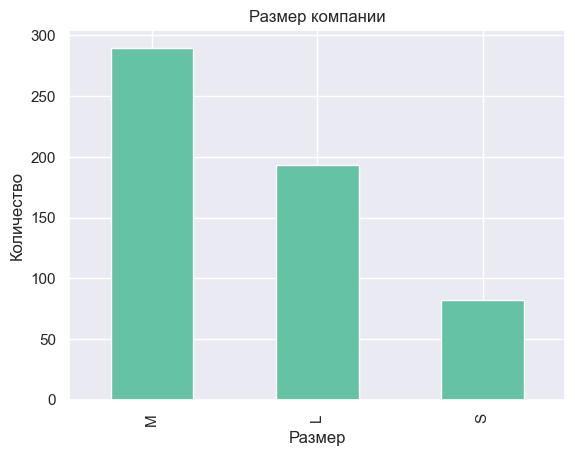

In [16]:
display('Категориальные признаки')
salaries_df['company_size'].value_counts().plot(kind='bar')
plt.title('Размер компании')
plt.xlabel('Размер')
plt.ylabel('Количество')

## Вывод:

В данных три вида-размера компаний: Малый (S), Средний (M) и Крупный (L). Больше всего компаний - средние.

# <center> ОТВЕТЫ НА КЛЮЧЕВЫЕ ВОПРОСЫ (ВИЗУАЛЬНЫЙ АНАЛИЗ)

## 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

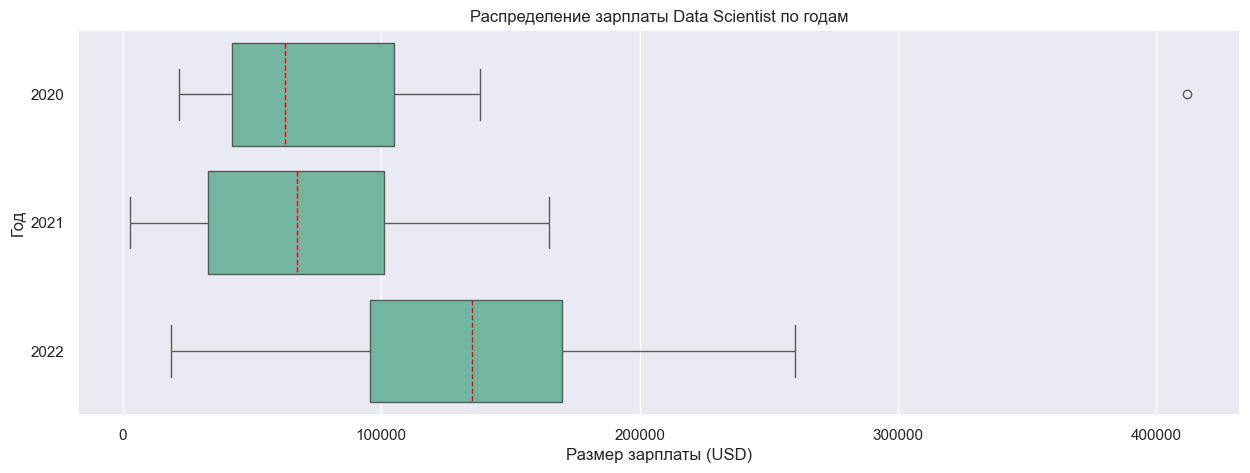

In [17]:
# Фильтруем данные по специальности Data Scientist
data_scientist = salaries_df[salaries_df['job_title'] == 'Data Scientist']

fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Создание графика boxplot
ax = sns.boxplot(
    data=data_scientist,
    x='salary_in_usd', 
    y='work_year', 
    orient='h', 
    medianprops={"color": "red", "linestyle": '--'}, 
    ax=axes
)

# Установка меток осей
ax.set(xlabel='Размер зарплаты (USD)', ylabel='Год')

# Установка заголовка графика
plt.title('Распределение зарплаты Data Scientist по годам')
plt.show()

## Вывод:

Из графика видно, что у специалистов Data Scientist наблюдается ежегодный рост зарплат особенно в 2022 году, также в данных присутствуют выбросы ввиде круга в верхнем правом углу.

Рост зарплат растет из года в год (индексируется), это связано скорее всего с тем, что специалисты востребованы на рынке труда работодатель устанавливает конкурентную зарплату.

## 2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

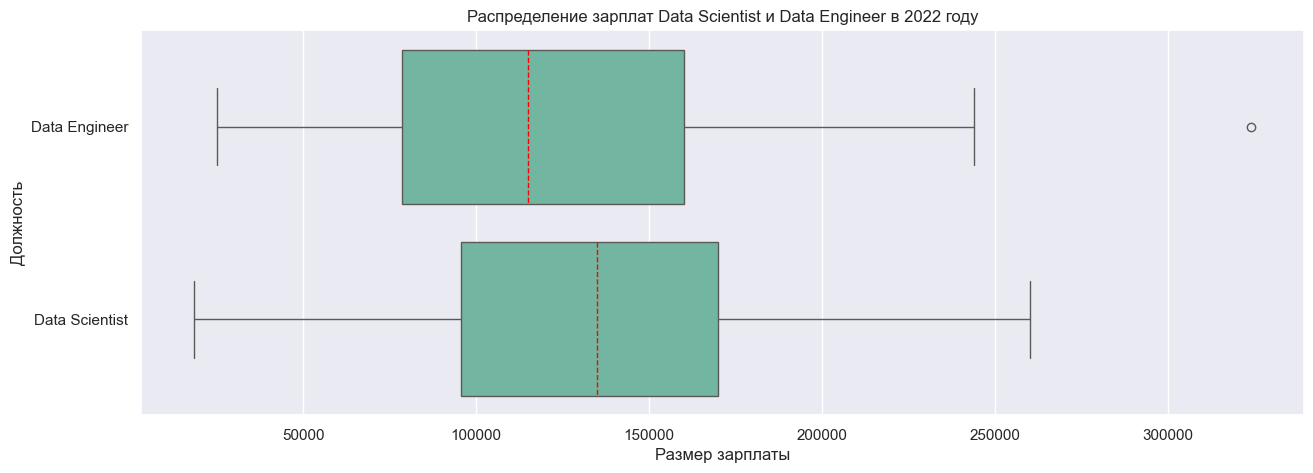

In [18]:
# Фильтруем DataFrame по должностям Data Scientist и Data Engineer и году 2022
ds_de_2022 = salaries_df[(salaries_df['job_title'].isin(['Data Scientist', 'Data Engineer'])) & (salaries_df['work_year'] == 2022)]

fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Создание графика boxplot
ax = sns.boxplot(
    data=ds_de_2022, 
    x='salary_in_usd', 
    y='job_title', 
    orient='h', 
    medianprops={"color": "red", "linestyle": '--'}, 
    ax=axes
)

# Установка меток осей
ax.set(xlabel='Размер зарплаты', ylabel='Должность')

# Установка заголовка графика
plt.title('Распределение зарплат Data Scientist и Data Engineer в 2022 году')
plt.show()

## Вывод:

Из графика видно, что заработные платы должностей отличаются между собой в 2022 году. Видно, что в среднем ЗП для должности Data Scientist выше на 10000.

В данных среди Data Engineer присутствуют выбросы, поэтому максимальное значение выше (324000) чем у Data Scientist (260000).

В целом зарплаты не сильно отличаются между собой, однако нижняя граница ЗП у Data Engineer выше, что говорит о том, что на начальном этапе Data Engineer будет получать чуть больше своего коллеги.

## 3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

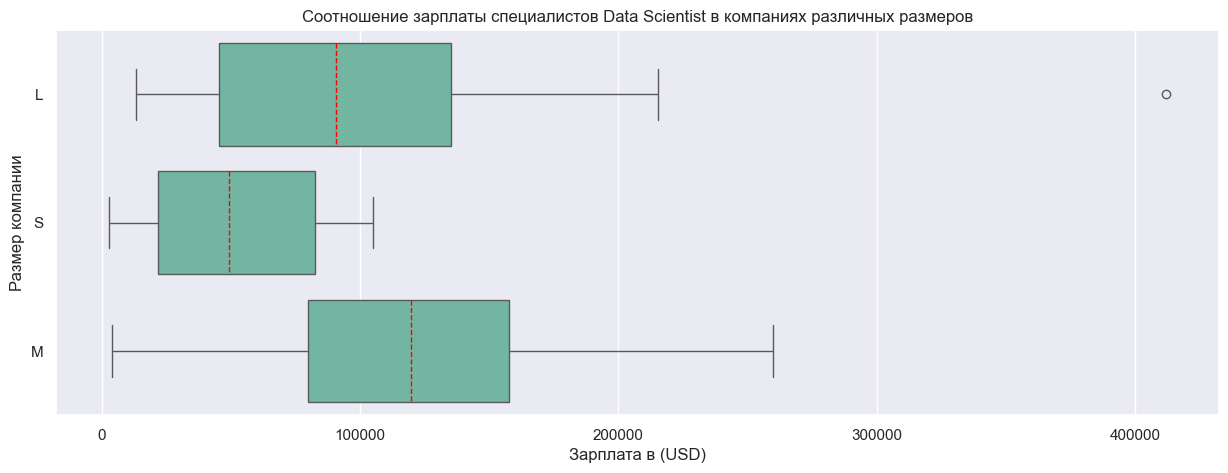

In [19]:
# специальность - Data Science
data_scientist = salaries_df[salaries_df['job_title'] == 'Data Scientist']

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
# Создание гистограммы
ax = sns.boxplot(
    data=data_scientist, 
    x='salary_in_usd',
    y='company_size',
    orient='h',
    medianprops={"color": "red", "linestyle": '--'},
    ax=axes)

# Установка меток осей
plt.xlabel("Зарплата в (USD)")
plt.ylabel("Размер компании")

# Установка заголовка графика
plt.title("Соотношение зарплаты специалистов Data Scientist в компаниях различных размеров")

# Отображение графика
plt.show()

In [20]:
# Группировка зарплат Data Scientist по размеру компании
ds_grouped_by_company_size = data_scientist.groupby('company_size')['salary_in_usd'].mean().reset_index()
display(ds_grouped_by_company_size)

,company_size,salary_in_usd
0,L,102743.418605
1,M,120080.575758
2,S,51925.761905


## Вывод:

Из графика видно, что заработные платы Data Scientist отличаются друг от друга в среднем:
- В маленьких компаниях (S) зарплаты составляют 51925.761905;
- В средних компаниях (M) зарплаты в составляют 120080.575758;
- В крупных компаниях (L) показатель cредний показатель зарплат 102743.418605.

Размер компании влияет на уровень зарплат. Нижняя граница ЗП у крупных компаний выше, это говорит о том, что Junior специалисту будут платить больше в крупной компании, однако судя по графику, в средних компаниях Data Scientis имеет более шикорий спектр ЗП.

## 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

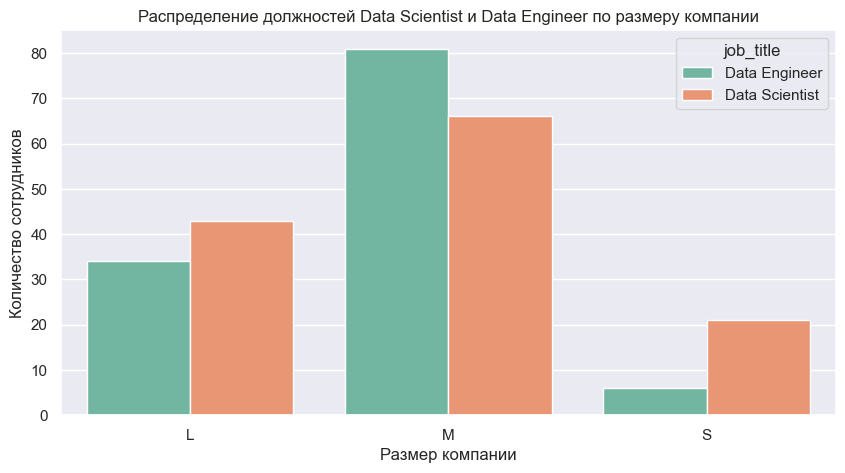

In [21]:
# Фильтруем данные по специальностям Data Scientist и Data Engineer
ds_de_filter = salaries_df[salaries_df['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Группируем данные по размеру компании и должности
grouped_data = ds_de_filter.groupby(['company_size', 'job_title']).size().unstack().reset_index()

# Задаем параметры графика
fig, ax = plt.subplots(figsize=(10, 5))

# Строим столбчатую диаграмму
sns.barplot(
    data=grouped_data.melt(id_vars='company_size', var_name='job_title', value_name='count'),
    x='company_size',
    y='count',
    hue='job_title',
    palette='Set2'
)

# Устанавливаем подписи осей и заголовок
ax.set_xlabel('Размер компании')
ax.set_ylabel('Количество сотрудников')
plt.title('Распределение должностей Data Scientist и Data Engineer по размеру компании')

# Отображаем график
plt.show()

## Вывод:

По графику видно, как распределяются должности Data Scientis и Data Engineer в компаниях:
- В маленьких компаниях (S) среди должностей преобладают Data Scientist, более чем в половину;
- В средних компаниях (M) Data Engineer не существенно, но превалируют над Data Scientist;
- В крупных компаниях (L) Data Scientist немного больше чем Engineer.

Таким образом можно увидеть зависимость между размером компании и необходимостью определенных должностей в ней.

## 5. (Дополнительно) Распределение должностей Data Scientist и Data Engineer по опыта работы и среднему уровню зарплаты

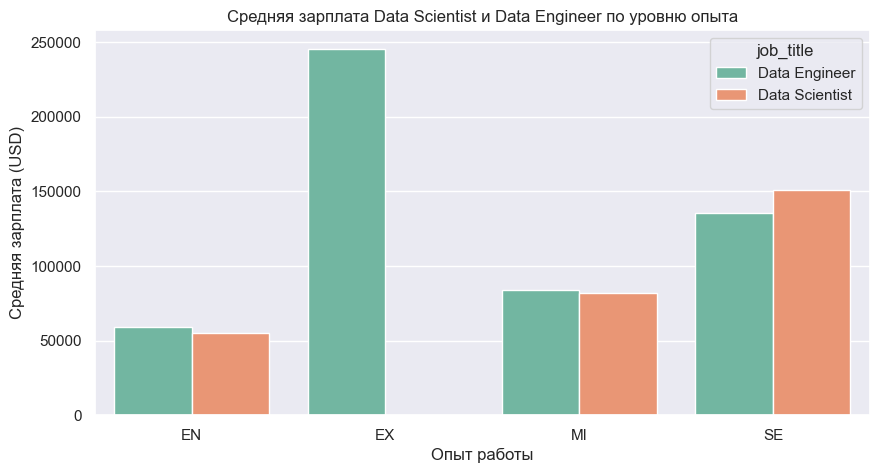

In [22]:
# Фильтруем данные по специальностям Data Scientist и Data Engineer
relevant_jobs = salaries_df['job_title'].isin(['Data Scientist', 'Data Engineer'])

# Группируем данные по уровню опыта и должности, рассчитываем среднюю зарплату
grouped_data = salaries_df[relevant_jobs].groupby(['experience_level', 'job_title'])['salary_in_usd'].mean().reset_index()

# Задаем параметры графика
fig, ax = plt.subplots(figsize=(10, 5))

# Строим столбчатую диаграмму
sns.barplot(
    data=grouped_data,
    x='experience_level',
    y='salary_in_usd',
    hue='job_title',
    palette='Set2'
)

# Устанавливаем подписи осей и заголовок
ax.set_xlabel('Опыт работы')
ax.set_ylabel('Средняя зарплата (USD)')
plt.title('Средняя зарплата Data Scientist и Data Engineer по уровню опыта')

# Отображаем график
plt.show()

## Вывод:

В качестве дополнительных закономерностей можно выделить соотношения между опытом работы, должностями и уровню ЗП:
- Data Engineer имеют чуть большую ЗП в среднем чем Data Scientist на начальном (Junior) уровне опыта работы;
- Data Engineer имеют имеет незначительно больше ЗП чем Data Scientist на среднем (Middle) уровне опыта работы;
- Data Scientis получают ЗП значительно больше чем свои коллеги на экспертном уровне (Senior);

На высшем управленческом уровне (Director) данные ЗП присутствуют только у Data Engineer, что наталкивает на аномалии.

Опыт работы и должность влияют на уровень заработных плат.

## 5.1 (Дополнительно) Размер средней заработной платы в двух самых крупных рынках работодателей

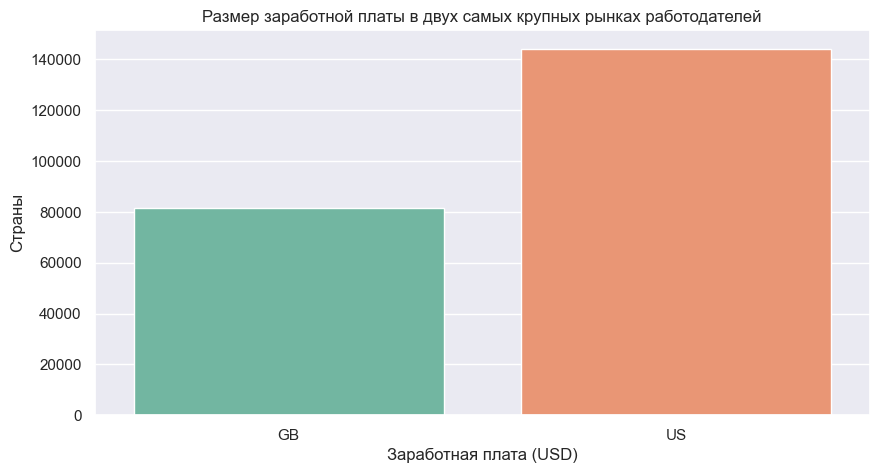

In [23]:
# Фильтруем данные - самое большое количество компаний по странам
co_location = salaries_df[salaries_df['company_location'].isin(['US', 'GB'])]

# Группируем данные по размеру компании и местоположению (с помощью size подсчитываем количество компаний в каждой группе)
grouped_data = co_location.groupby(['company_location'])['salary_in_usd'].mean().reset_index()

# Задаем параметры графика
fig, ax = plt.subplots(figsize=(10, 5))

# Строим столбчатую диаграмму
sns.barplot(
data=grouped_data,
x='company_location',
y='salary_in_usd',
hue='company_location',
palette='Set2'
)

# Устанавливаем подписи осей и заголовок
ax.set_xlabel('Заработная плата (USD)')
ax.set_ylabel('Страны')
plt.title('Размер заработной платы в двух самых крупных рынках работодателей')

# Отображаем график
plt.show()

## Вывод:

Видно, что рынок Великобритании (GB) по зарплатам уступает рынку США (US). В датасете US является самым крупным рынком труда по количеству компаний и уровню заработных плат (ЗП) и имеет сильный разрыв с другими странами. Это связано с более развитой экономикой и размером страны.

Местоположение компаний влияет на уровень ЗП, платят больше в США.

Предварительный анализ данных выделил факторы влияющие на уровень заработной платы (ЗП):

- Должность (job_title): Различные должности (Data Scientist и Data Engineer) требуют разного уровня квалификации и ответственности, что напрямую влияет на уровень заработной платы.

- Уровень опыта (experience_level): Опыт является важным фактором. Более опытные специалисты, как правило, получают более высокую заработную плату.

- Местоположение компании (company_location): Заработная плата может значительно варьироваться в зависимости от региона или страны. Например, зарплаты в США часто выше, чем в других странах, из-за разницы в стоимости жизни и уровнях экономического развития.

- Размер компании (company_size): Крупные и средние компании зачастую платят больше, чем малые, так как они могут предложить лучшие условия труда и более высокие зарплаты.

Есть и другие факторы влияющие на уровень заработной платы, например:

- Тип занятости (employment_type)
- Локация сотрудника (employee_residence)
- Доля удаленной работы (remote_ratio)

Однако для этого нужно проводить дополнительные исследования.

## <center> ОТВЕТЫ НА КЛЮЧЕВЫЕ ВОПРОСЫ (СТАТИСТИЧЕСКИЙ АНАЛИЗ)

In [24]:
# задаём уровень значимости
print(f"Уровень значимости alpha = {ALPHA}")

Уровень значимости alpha = 0.05


## 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Рост зарплат специалистов Data Scientist не изменяется ежегодно, т.е в 2020 (μ_1), 2021 (μ_2), 2023 (μ_3) зарплата осталась одинаковой.

$$ H_0 : μ_1 == μ_2 == μ_3 $$

*Альтернативная гипотеза* ($H_1$): Рост зарплат у специалистов Data Scientist изменялся каждый год, т.е в 2020 (μ_1), 2021 (μ_2), 2023 (μ_3) зарплата росла.

$$ H_1 : μ_1 != μ_2 != μ_3 $$

**Подготовка данных**

In [25]:
# Устанавливаем процент выборки данных - 50%
frac = 0.5

# Подготовка данных для тестов
# Фильтруем данные по дожности
filter_data = salaries_df[salaries_df['job_title'] == 'Data Scientist']

# Cоздаем три группы и переводим в массив
salary_in_2020 = filter_data[salaries_df['work_year'] == 2020]['salary_in_usd']
salary_in_2021 = filter_data[salaries_df['work_year'] == 2021]['salary_in_usd']
salary_in_2022 = filter_data[salaries_df['work_year'] == 2022]['salary_in_usd']

# Добавляем в выборку процент от всех значений DataFrame
salary_in_2020 = np.array(salary_in_2020.sample(frac=frac))
salary_in_2021 = np.array(salary_in_2021.sample(frac=frac))
salary_in_2022 = np.array(salary_in_2022.sample(frac=frac))

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально! 
Гипотезы теста Шапиро-Уилка:

* Нулевая гипотеза ($H_0$): распределение данные является нормальным.
* Альтернативная гипотеза ($H_1$): распределение данных отлично от нормального.

In [43]:
display('Признак - ЗП (USD) за 2020')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(salary_in_2020)
decision_normality(p)

display('Признак - ЗП (USD) за 2021')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(salary_in_2021)
decision_normality(p)

display('Признак - ЗП (USD) за 2022')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(salary_in_2022)
decision_normality(p)

'Признак - ЗП (USD) за 2020'

p-value = 0.5

p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


'Признак - ЗП (USD) за 2021'

p-value = 0.565

p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


'Признак - ЗП (USD) за 2022'

p-value = 0.476

p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выбор теста**

Поскольку признаки: 
1. количественные;
2. состоят из 3-х групп;
3. группы зависимы, т.к. должность везде одна - Data Scientist;
4. один из трех распределен отлично от нормального.

Тест: Критерий Фридмана (непараметрический тест).

Однако, в ходе выполнения теста выяснялось, что одна из трех групп имеют разное количество значений. Чтобы решить эту проблему, используем другой тест - критерий Краскела-Уоллиса.

In [45]:
# проводим тест КРАСКЕЛА — УОЛЛИСА
display('Тест КРАСКЕЛА — УОЛЛИСА')
_, p = stats.kruskal(salary_in_2020, salary_in_2021, salary_in_2022)
decision_hypothesis(p)

'Тест КРАСКЕЛА — УОЛЛИСА'

p-value = 0.0

p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


## Вывод: 

Зарплата Data Scientist растет из года в год, что подтвержают визуальный и статистический тесты.

## 2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Зарплата Data Scientist (μ_1) больше, либо равна Data Engineer (μ_2) в 2022 году.

$$ H_0 : μ_1 >= μ_2 $$

*Альтернативная гипотеза* ($H_1$): Зарплата Data Scientist (μ_1) меньше чем у Data Engineer (μ_2) в 2022 году.

$$ H_1 : μ_1 < μ_2 $$

**Подготовка данных**

In [28]:
# Устанавливаем процент выборки данных - 50 %
frac = 0.5

# Подготовка данных для тестов
# Создаем две группы
ds_salary = salaries_df[(salaries_df['job_title'] == 'Data Scientist') & (salaries_df['work_year'] == 2022)]['salary_in_usd']
de_salary = salaries_df[(salaries_df['job_title'] == 'Data Engineer') & (salaries_df['work_year'] == 2022)]['salary_in_usd']

# Добавляем в выборку процент от всех значений DataFrame
ds_salary = np.array(ds_salary.sample(frac=frac))
de_salary = np.array(de_salary.sample(frac=frac))

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально! 
Гипотезы теста Шапиро-Уилка:

* Нулевая гипотеза ($H_0$): распределение данные является нормальным.
* Альтернативная гипотеза ($H_1$): распределение данных отлично от нормального.

In [29]:
display('Признак - ЗП (USD) для Data Scientist')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(ds_salary)
decision_normality(p)

display('Признак - ЗП (USD) для Data Engineer')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(de_salary)
decision_normality(p)

'Признак - ЗП (USD) для Data Scientist'

p-value = 0.321

p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


'Признак - ЗП (USD) для Data Engineer'

p-value = 0.009

p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выбор теста**

Поскольку признаки: 
1. количественные;
2. состоят из 2-х групп;
3. группы независимы;
4. один из двух распределен отлично от нормального.

Тест: U-критерий Манна - Уитни (непараметрический тест)

In [30]:
# проводим тест манна-уитни
display('Тест U-КРИТЕРИЙ МАННА — УИТНИ')
_, p = stats.mannwhitneyu(ds_salary, de_salary, alternative='greater')
decision_hypothesis(p)

'Тест U-КРИТЕРИЙ МАННА — УИТНИ'

p-value = 0.137

p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## Вывод:

Зарплата Data Scientist больше чем у Data Engineer в 2022 году, что подтверждают визуальный и статистический тесты. 

## 3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Зарплаты Data Scientist в компаниях разных размеров: S (μ_1), M (μ_2), L (μ_3) не различаются. Иными словами, размер компании не влияет на зарплату Data Scientist.

$$ H_0 : μ_1 == μ_2 == μ_3 $$

*Альтернативная гипотеза* ($H_1$): Зарплаты Data Scientist в компаниях разных размеров: S (μ_1), M (μ_2), L (μ_3) различаются. Иными словами, размер компании влияет на зарплату Data Scientist.

$$ H_1 : μ_1 != μ_2 != μ_3$$

**Подготовка данных**

In [31]:
# Устанавливаем процент выборки данных
frac = 0.5

# Подготовка данных для тестов
# Фильтруем данные по должности
data_scientist = salaries_df[salaries_df['job_title'] == 'Data Scientist']

# Создаем группы
salary_in_s = data_scientist[salaries_df['company_size'] == 'S']['salary_in_usd']
salary_in_m = data_scientist[salaries_df['company_size'] == 'M']['salary_in_usd']
salary_in_l = data_scientist[salaries_df['company_size'] == 'L']['salary_in_usd']

# Добавляем в выборку процент от всех значений DataFrame
salary_in_s = np.array(salary_in_s.sample(frac=frac))
salary_in_m = np.array(salary_in_m.sample(frac=frac))
salary_in_l = np.array(salary_in_l.sample(frac=frac))

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально! 
Гипотезы теста Шапиро-Уилка:

* Нулевая гипотеза ($H_0$): распределение данные является нормальным.
* Альтернативная гипотеза ($H_1$): распределение данных отлично от нормального.

In [32]:
display('Признак - ЗП (USD) для Data Scientist в компании малого размера (S)')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(salary_in_s)
decision_normality(p)

display('Признак - ЗП (USD) для Data Scientist в компании среднего размера (M)')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(salary_in_m)
decision_normality(p)

display('Признак - ЗП (USD) для Data Scientist в компании большого размера (L)')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(salary_in_l)
decision_normality(p)

'Признак - ЗП (USD) для Data Scientist в компании малого размера (S)'

p-value = 0.35

p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


'Признак - ЗП (USD) для Data Scientist в компании среднего размера (M)'

p-value = 0.339

p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


'Признак - ЗП (USD) для Data Scientist в компании большого размера (L)'

p-value = 0.107

p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выбор теста**

Поскольку признаки: 
1. количественные;
2. состоят из 3-х групп;
3. группы независимы;
4. один из трех распределен отлично от нормального.

Тест: Критерий Краскела-Уоллиса (непараметрический тест)

In [33]:
# проводим тест КРАСКЕЛА — УОЛЛИСА
display('Тест КРАСКЕЛА — УОЛЛИСА')
_, p = stats.kruskal(salary_in_s, salary_in_m, salary_in_l)
decision_hypothesis(p)

'Тест КРАСКЕЛА — УОЛЛИСА'

p-value = 0.001

p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


## Вывод:

Зарплаты у Data Scientist в компаниях разного размера различны, что подтверждается как визуальным графиком, так и статистическим тестом.

## 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Наличие должностей Data Scientist и Data Engineer не связано с размером компании. Иными словами, распределение должностей Data Scientist и Data Engineer не зависит от размера компании.

*Альтернативная гипотеза* ($H_1$): Наличие должностей Data Scientist и Data Engineer связано с размером компании. Иными словами, распределение должностей Data Scientist и Data Engineer зависит от размера компании.

**Выбор теста**

Поскольку признаки: 
1. оба признака являются категориальными.

Тест: Критерий Хи-квадрат ($X_2$)

In [34]:
# Фильтруем данные по должностям Data Scientist и Data Engineer
filtered_df = salaries_df[salaries_df['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Строим таблицу сопряженности
table = pd.crosstab(filtered_df['job_title'], filtered_df['company_size'])

# Выводим таблицу сопряженности
display(table)

# Проводим тест
_, p, _, _ = stats.chi2_contingency(table)
decision_hypothesis(p)

company_size,L,M,S
job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21


p-value = 0.005

p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


## Вывод:

Распределение должностей Data Scientist и Data Engineer зависит от размера компании, что подтверждается визуальным графиком. Таблица сопряженности показала, что в больших и средних компаниях больше вакансий Data Scientist и Data Engineer, чем в малых.

## 4.1 Какого распределение зарплат Data Scientist и Data Engineer на позициях Middle (Средний уровень)

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): На позиции Middle Data Scientist получает меньше заработной платы, либо столько же, как и Data Engineer.

*Альтернативная гипотеза* ($H_1$): На позиции Middle Data Scientist получает больше заработной платы чем Data Engineer.

**Подготовка данных**

In [35]:
# Устанавливаем процент выборки данных
frac = 0.5

# Подготовка данных для тестов
# Фильтруем данные для среднего уровня (Middle) опыта
middle_data = salaries_df[salaries_df['experience_level'] == 'MI']

# Группировка данных по должности и вычисление средней зарплаты
middle_salaries = middle_data.groupby('job_title')['salary_in_usd'].mean().loc[['Data Scientist', 'Data Engineer']]
data_salaries = middle_data[middle_data['job_title'].isin(['Data Scientist', 'Data Engineer'])]
ds_salaries = data_salaries[data_salaries['job_title'] == 'Data Scientist']['salary_in_usd']
de_salaries = data_salaries[data_salaries['job_title'] == 'Data Engineer']['salary_in_usd']

# Добавляем в выборку процент от всех значений DataFrame
ds_salaries = np.array(ds_salaries.sample(frac=frac))
de_salaries = np.array(de_salaries.sample(frac=frac))

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально! 
Гипотезы теста Шапиро-Уилка:

* Нулевая гипотеза ($H_0$): распределение данные является нормальным.
* Альтернативная гипотеза ($H_1$): распределение данных отлично от нормального.

In [36]:
display('Признак - Уровня опыта (Middle) для Data Scientist')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(ds_salaries)
decision_normality(p)

display('Признак - Уровня опыта (Middle) для Data Engineer')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(de_salaries)
decision_normality(p)

'Признак - Уровня опыта (Middle) для Data Scientist'

p-value = 0.628

p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


'Признак - Уровня опыта (Middle) для Data Engineer'

p-value = 0.401

p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выбор теста**

Поскольку признаки: 
1. количественные;
2. состоят из 2-х групп;
3. группы независимы;
4. одна из групп распределены отлично от нормального

Тест: U-критерий Манна - Уитни

In [37]:
# проводим тест манна-уитни
display('Тест U-КРИТЕРИЙ МАННА — УИТНИ')
_, p = stats.mannwhitneyu(ds_salary, de_salary, alternative='greater')
decision_hypothesis(p)

'Тест U-КРИТЕРИЙ МАННА — УИТНИ'

p-value = 0.137

p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## Вывод:

На позиции Middle (Cредний уровень) заработная плата у Data Scientist меньше чем Data Engineer, что в целом подтверждается визуальным графиком и статистическим тестом.

## 4.2 Каков уровень заработной платы в США и Великобритании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Уровень заработной платы в США больше чем в Великобритании, либо сопоставимый.

*Альтернативная гипотеза* ($H_1$): Уровень заработной платы в США меньше чем в Великобритании.

**Подготовка данных**

In [38]:
# Устанавливаем процент выборки данных
frac = 0.5

# Подготовка данных для тестов
# Фильтрация данных по странам США и Великобритания
us_uk_data = salaries_df[salaries_df['company_location'].isin(['US', 'GB'])]

# Группировка данных и вычисление средней зарплаты
us_uk_salaries = us_uk_data.groupby('company_location')['salary_in_usd'].mean()
us_salaries = us_uk_data[us_uk_data['company_location'] == 'US']['salary_in_usd']
uk_salaries = us_uk_data[us_uk_data['company_location'] == 'GB']['salary_in_usd']

# Добавляем в выборку процент от всех значений DataFrame
us_salaries = np.array(us_salaries.sample(frac=frac))
uk_salaries = np.array(uk_salaries.sample(frac=frac))

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяем, распределён ли признак нормально! 
Гипотезы теста Шапиро-Уилка:

* Нулевая гипотеза ($H_0$): распределение данные является нормальным.
* Альтернативная гипотеза ($H_1$): распределение данных отлично от нормального.

In [41]:
display('Признак - Уровня зарабоной платы в для США')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(us_salaries)
decision_normality(p)

display('Признак - Уровня зарабоной платы в для Великобритании')
# проводим тест Шапиро-Уилка
_, p = stats.shapiro(uk_salaries)
decision_normality(p)

'Признак - Уровня зарабоной платы в для США'

p-value = 0.0

p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


'Признак - Уровня зарабоной платы в для Великобритании'

p-value = 0.196

p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выбор теста**

Поскольку признаки:
1. количественные;
2. состоят из 2-х групп;
3. группы независимы;
4. одна из групп распределена отлично от нормального.

Тест: U-критерий Манна - Уитни

In [42]:
# проводим тест манна-уитни
display('Тест U-КРИТЕРИЙ МАННА — УИТНИ')
_, p = stats.mannwhitneyu(us_salaries, uk_salaries, alternative='less')
decision_hypothesis(p)

'Тест U-КРИТЕРИЙ МАННА — УИТНИ'

p-value = 1.0

p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## Вывод:

Уровень заработных плат в США выше чем в Великобритании, что подтверждается как визуальным тестом, так и статистическим.

## Заключение:

В результате проведенного анализа данных о зарплатах специалистов Data Scientist и Data Engineer за 2020–2022 годы удалось выявить ряд ключевых выводов, которые дают представление о тенденциях в IT индустрии и факторах, влияющих на уровень заработной платы.

Факторы, влияющие на зарплату Data Scientist:

- Уровень опыта: Как и ожидалось, зарплаты растут с увеличением опыта. Специалисты с более высоким уровнем опыта, такими как Senior/Expert, получают значительно выше среднеq уровня зарплат по отрасли.

- Размер компании: Размер компании имеет значительное влияние на уровень зарплаты. Большие компании (с численностью сотрудников более 250 человек) предлагают более высокие зарплаты по сравнению с малыми компаниями (менее 50 сотрудников), и более высокий начальный порог зарплат для Junior специалистом.

- Тип занятости и удаленная работа: Полная занятость и высокая доля удаленной работы могут также положительно коррелировать с уровнем зарплат, хотя для более точной оценки этих факторов потребуется дополнительный анализ.

_Ежегодный рост зарплат у специалистов Data Scientist:_

Данные показывают, что зарплаты Data Scientist значительно выросли в 2022 году по сравнению с 2020 и 2021 годами. Средняя зарплата увеличилась почти в два раза в 2022 году, что свидетельствует о высоком спросе на этих специалистов.

Статистический тест Краскелла - Уоллиса подтвердил, что этот рост является значимым, это указывает на изменения в рынке труда, возможно связанные с увеличением значимости анализа данных и искусственного интеллекта в бизнесе.

_Соотношение зарплат Data Scientist и Data Engineer в 2022 году:_

Cредние зарплаты Data Scientist и Data Engineer в 2022 году не сильно различаются однако, статистический тест Манна-Уитни подтвердил теорию о том, что зарплаты Data Scientist в целом выше. Это может говорить о схожем уровне спроса на оба типа специалистов в текущих условиях рынка труда, однако Data Scientist, как "средняя боевая единица" требуются немного больше.
Тем не менее, для отдельных компаний или регионов могут быть различия, которые не были учтены в рамках общего анализа.

_Соотношение зарплат специалистов Data Scientist в компаниях различных размеров:_

Различия в зарплатах между специалистами Data Scientist в больших, средних и малых компаниях были значимыми. Малые компании предлагают значительно более низкие зарплаты по сравнению с крупными и средними.
Это может быть связано с различием в ресурсах и возможностях между компаниями различного размера. Крупные компании могут позволить себе привлекать более опытных специалистов и платить им выше среднего, чтобы оставаться конкурентоспособными на рынке.

_Связь между наличием должностей Data Scientist и Data Engineer и размером компании:_

Хи-квадрат тест показал, что существует статистически значимая связь между размером компании и наличием в ней позиций Data Scientist и Data Engineer. Большие и средние компании чаще предлагают такие позиции, что связано с их возможностями внедрять более сложные и масштабные проекты, требующие участия специалистов по данным.

_Общие выводы:_

Рост значимости Data Scientist: В последние годы наблюдается существенное увеличение спроса на специалистов Data Scientist, что отражается в значительном росте их зарплат. Это свидетельствует о возрастающей роли анализа данных и искусственного интеллекта в бизнесе.

Влияние размера компании: Большие компании продолжают доминировать в предложении более высоких зарплат, что делает их привлекательным местом для опытных специалистов. Малые компании могут компенсировать это, предлагая другие преимущества, такие как гибкость и возможность быстрого карьерного роста.

Схожесть зарплат Data Scientist и Data Engineer: Несмотря на схожий уровень зарплат между этими двумя специальностями, стоит учитывать различие в задачах и навыках, требуемых от специалистов, что может влиять на карьерные пути и ожидания от работы.